In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='etherman', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='etherman', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='etherman', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=0, enemy_defense_bonus=13.8,hero='etherman', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,1.68,1.75,2.04,2.40,2.87
21,11.0,1.34,2.09,2.31,2.90,2.97
22,12.0,1.53,1.74,2.22,2.77,2.72
23,12.0,1.68,2.06,2.31,2.25,3.08
24,13.0,1.22,1.78,2.40,2.61,2.80
25,13.0,1.41,1.55,2.52,2.37,2.60
26,14.0,1.42,1.78,2.31,2.78,3.38
27,14.0,1.66,1.79,2.33,2.72,2.96
28,15.0,1.48,1.75,2.18,2.38,2.70
29,15.0,1.42,1.89,2.04,2.29,2.67


# TOTAL GOLDZ AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,14.84,18.18,22.66,25.47,28.75


Text(0.5, 1.0, 'Total Goldz After 5 Days')

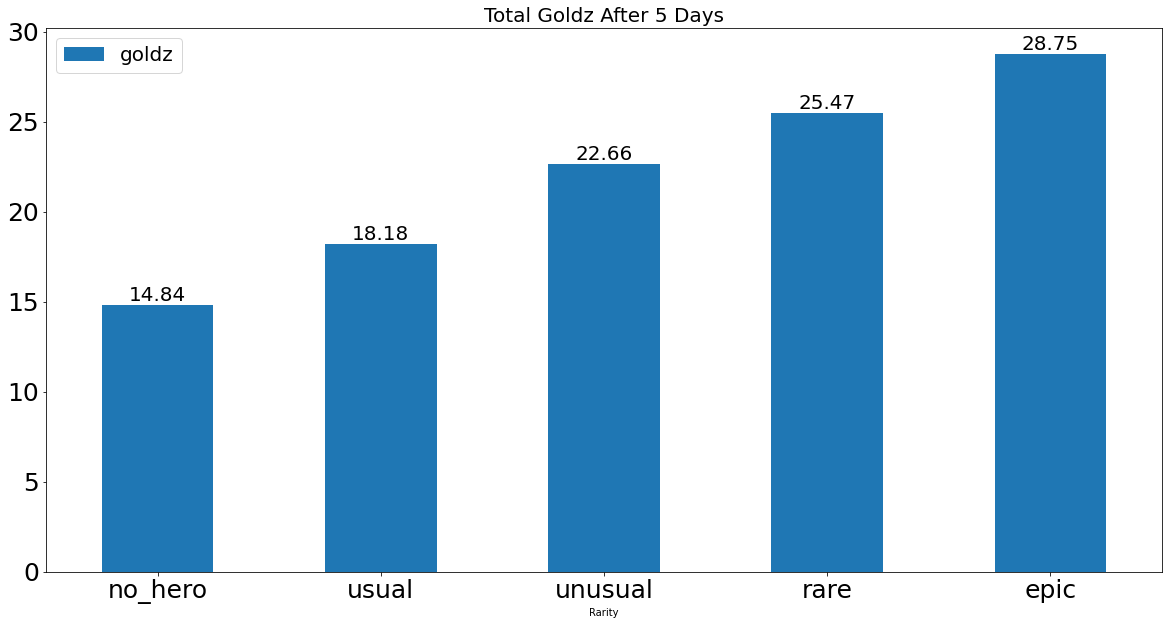

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Goldz After 5 Days", fontsize=20)

# GOLDZ AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,1.484,1.818,2.266,2.547,2.875


Text(0.5, 1.0, 'Goldz Average on Each attack')

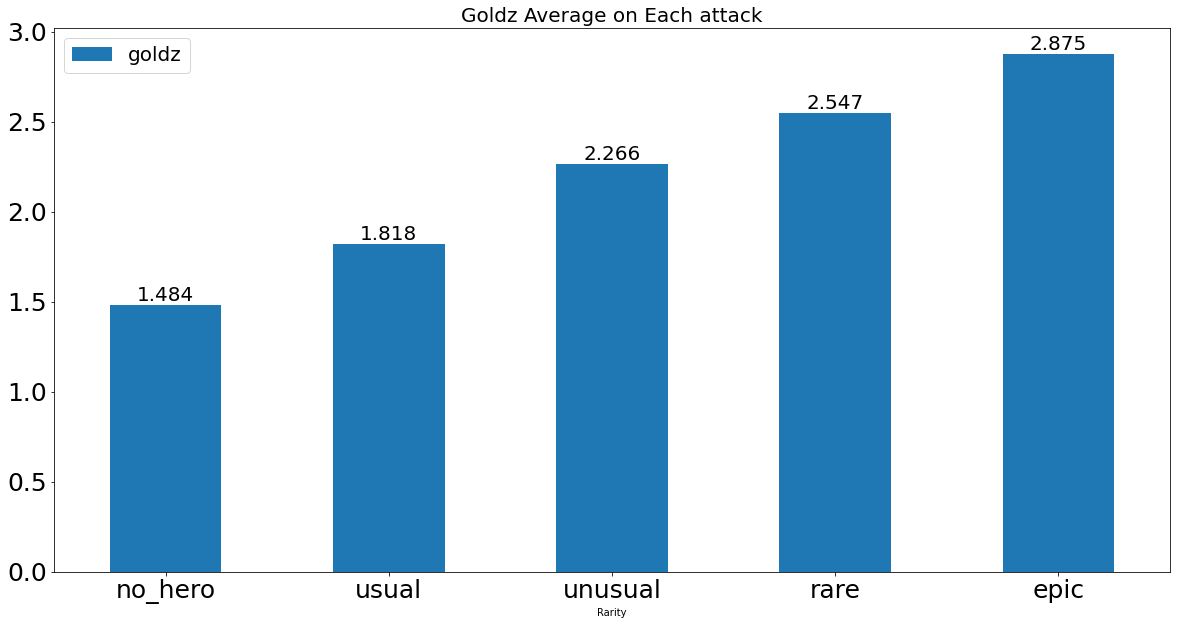

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'goldz':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Goldz Average on Each attack", fontsize=20)

# GOLDZ DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,0.07,0.36,0.72,1.19
21,11.0,0.75,0.97,1.56,1.63
22,12.0,0.21,0.69,1.24,1.19
23,12.0,0.38,0.63,0.57,1.40
24,13.0,0.56,1.18,1.39,1.58
25,13.0,0.14,1.11,0.96,1.19
26,14.0,0.36,0.89,1.36,1.96
27,14.0,0.13,0.67,1.06,1.30
28,15.0,0.27,0.70,0.90,1.22
29,15.0,0.47,0.62,0.87,1.25


# TOTAL GOLDZ EARNED COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,3.34,7.82,10.63,13.91


Text(0.5, 1.0, 'Total Diff Goldz After 5 Days Compared to No Hero')

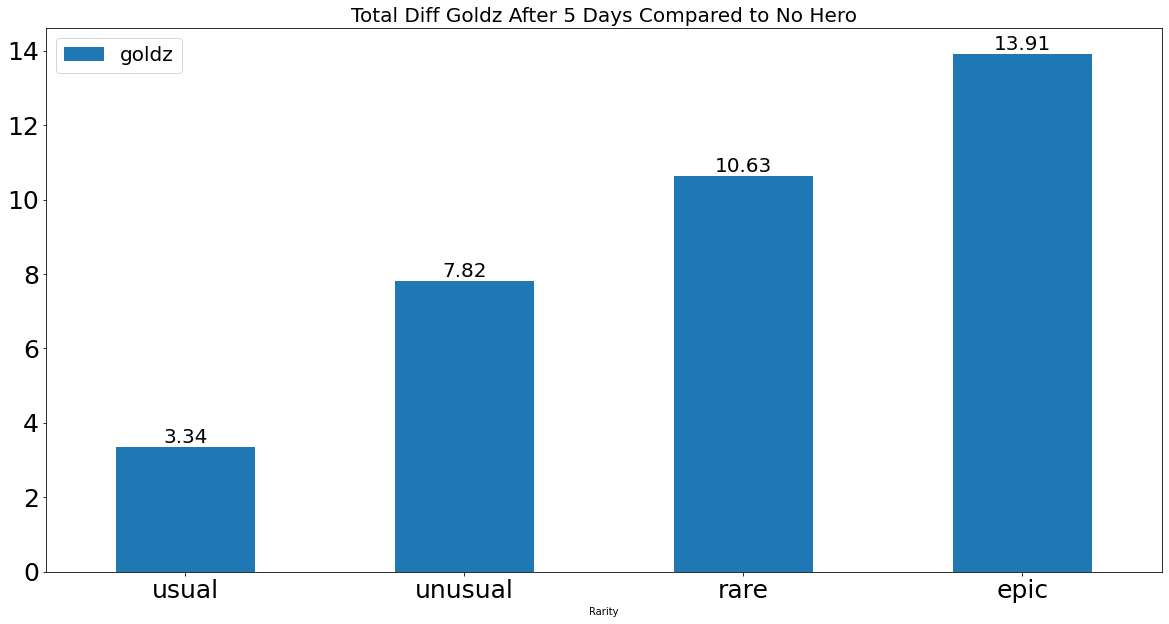

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'goldz':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Goldz After 5 Days Compared to No Hero", fontsize=20)

# GOLDZ DIFFERENCE EARNED PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,0.334,0.782,1.063,1.391


Text(0.5, 1.0, 'Diff Goldz Average per Attack')

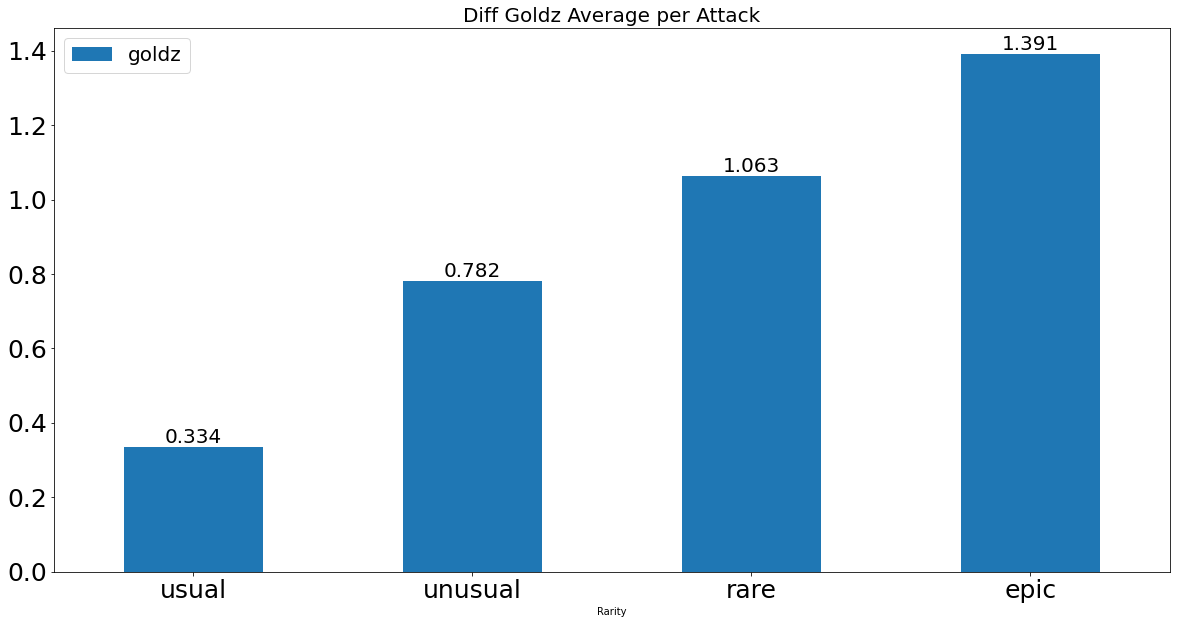

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'goldz':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')
# ax = df_diff_mean0.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Goldz Average per Attack", fontsize=20)